<a href="https://colab.research.google.com/github/ShvetsAlla/repo1/blob/main/%D0%BF%D1%80%D0%B5%D0%B4%D0%B8%D0%BA%D1%82_LTV_%D0%BA%D0%BE%D1%80%D0%B8%D1%81%D1%82%D1%83%D0%B2%D0%B0%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files

# Завантажте файл з вашого комп'ютера
uploaded = files.upload()

Saving Product Analyst Test Task Data [Ver 2] – копія - Task 2.csv to Product Analyst Test Task Data [Ver 2] – копія - Task 2 (6).csv


In [15]:
import pandas as pd

# Прочитати CSV файл
df = pd.read_csv('Product Analyst Test Task Data [Ver 2] – копія - Task 2 (1).csv')

# Вивести перші кілька рядків
print(df.head())

                                user_id     event_timestamp  \
0  6f8592c0-fb4c-47dc-9344-424eb5d88a4b  2023-10-13 9:54:02   
1  95287b91-85af-4174-9986-aeafb3853bb6  2023-10-14 4:45:14   
2  95287b91-85af-4174-9986-aeafb3853bb6  2023-03-25 4:44:40   
3  95287b91-85af-4174-9986-aeafb3853bb6  2023-04-01 4:44:16   
4  95287b91-85af-4174-9986-aeafb3853bb6  2023-04-08 4:45:55   

  first_purchase_time cohort_week  lifetime_weeks   product_id  
0  2023-10-13 9:54:02  2023-10-08               0  weekly.2.49  
1  2023-03-25 4:44:40  2023-03-19              29  weekly.2.49  
2  2023-03-25 4:44:40  2023-03-19               0  weekly.2.49  
3  2023-03-25 4:44:40  2023-03-19               1  weekly.2.49  
4  2023-03-25 4:44:40  2023-03-19               2  weekly.2.49  


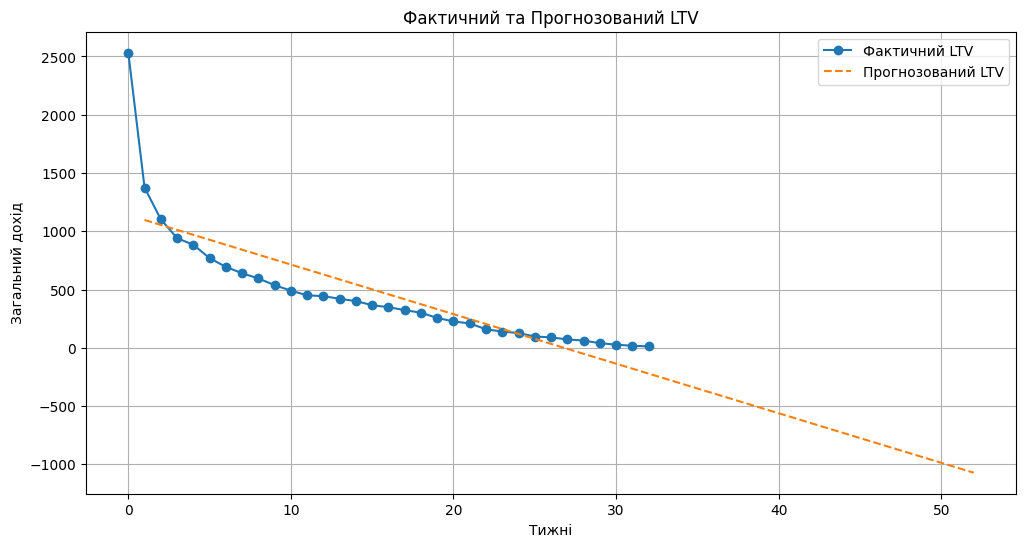

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# Конвертуємо дати
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'])
data['first_purchase_time'] = pd.to_datetime(data['first_purchase_time'])

# Визначте вартість продукту на основі product_id
product_prices = {
    'weekly.2.49': 2.49,  # приклад вартості
    # додайте інші product_id та їхні ціни тут
}

# Створимо новий стовпець, який міститиме ціну підписки
data['price'] = data['product_id'].map(product_prices)

# Обчислюємо загальний дохід
revenue = data.groupby(['user_id', 'lifetime_weeks'])['price'].sum().reset_index()
revenue = revenue.rename(columns={'price': 'total_revenue'})

# Обчислення фактичного LTV
ltv = revenue.groupby('lifetime_weeks')['total_revenue'].sum().reset_index()

# Прогнозування LTV
X = ltv['lifetime_weeks'].values.reshape(-1, 1)
y = ltv['total_revenue'].values
model = LinearRegression()
model.fit(X, y)

# Генерація прогнозу на рік (52 тижні)
future_weeks = np.array(range(1, 53)).reshape(-1, 1)
predicted_ltv = model.predict(future_weeks)

# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(ltv['lifetime_weeks'], ltv['total_revenue'], label='Фактичний LTV', marker='o')
plt.plot(range(1, 53), predicted_ltv, label='Прогнозований LTV', linestyle='--')
plt.title('Фактичний та Прогнозований LTV')
plt.xlabel('Тижні')
plt.ylabel('Загальний дохід')
plt.legend()
plt.grid()

# Зберегти графік
plt.savefig('ltv_plot.png')  # Зберігаємо графік у файл
plt.show()

# Завантажити файл на ваш комп'ютер
files.download('ltv_plot.png')

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y, model.predict(X)))
r2 = r2_score(y, model.predict(X))

print(f'RMSE: {rmse}, R²: {r2}')

RMSE: 281.9309992923777, R²: 0.6735384201945881
